In [17]:
import pandas as pd
import numpy as np
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [4]:
df=pd.read_csv('Admission_Predict.csv')
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0             1        337          118                  4  4.5  4.5  9.65   
1             2        324          107                  4  4.0  4.5  8.87   
2             3        316          104                  3  3.0  3.5  8.00   
3             4        322          110                  3  3.5  2.5  8.67   
4             5        314          103                  2  2.0  3.0  8.21   
..          ...        ...          ...                ...  ...  ...   ...   
395         396        324          110                  3  3.5  3.5  9.04   
396         397        325          107                  3  3.0  3.5  9.11   
397         398        330          116                  4  5.0  4.5  9.45   
398         399        312          103                  3  3.5  4.0  8.78   
399         400        333          117                  4  5.0  4.0  9.66   

     Research  Chance of Admit  
0           1                1  
1           1                1  
2           1                0  
3           1                1  
4           0                0  
..        ...              ...  
395         1                1  
396         1                1  
397         1                1  
398         0                0  
399         1                1  

[400 rows x 9 columns]

In [7]:
df.head()
df.shape

(400, 9)

In [10]:
df.dtypes
df['Research']=df['Research'].astype(object)

In [21]:
df.dtypes
df = df.drop('Serial No.', axis = 1)

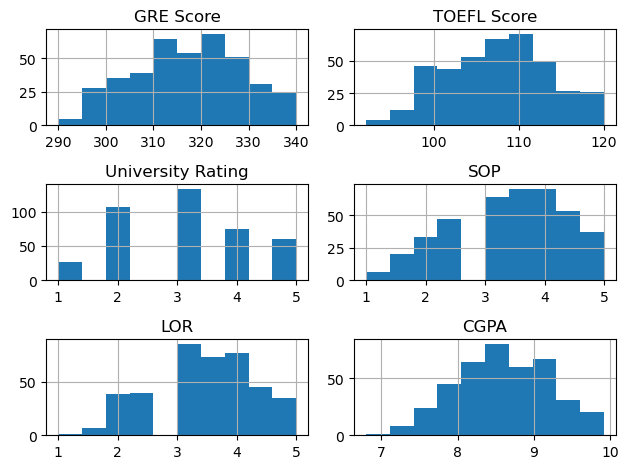

In [24]:

df.drop('Chance of Admit',axis=1).hist()
df.drop('Chance of Admit',axis=1).skew()
# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [31]:
df.drop('Chance of Admit',axis=1).skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [47]:
plt.bar(df['Chance of Admit'].value_counts()[]0)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (501664865.py, line 1)

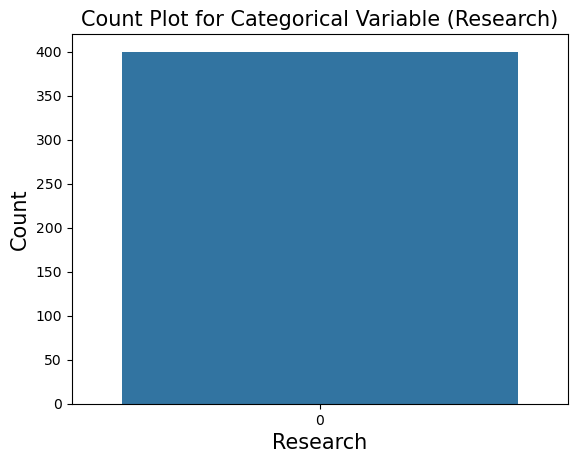

In [41]:
sns.countplot(df.Research)
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

In [68]:
Total=df.isnull().sum().sort_values(ascending=False)
Percent=(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

In [69]:
missing=pd.concat([Total,Percent],axis=1,keys=['Total','percent of missing'])

In [70]:
missing

Total  percent of missing
GRE Score              0            0.000000
TOEFL Score            0            0.000000
University Rating      0            0.000000
SOP                    0            0.000000
LOR                    0            0.000000
CGPA                   0            0.000000
Research               0            0.000000
Chance of Admit        0            0.000000

In [73]:
# dummy encode the catagorical values

df.dtypes
df

GRE Score  TOEFL Score  University Rating      SOP      LOR     CGPA  \
0          337          118                  4 4.500000 4.500000 9.650000   
1          324          107                  4 4.000000 4.500000 8.870000   
2          316          104                  3 3.000000 3.500000 8.000000   
3          322          110                  3 3.500000 2.500000 8.670000   
4          314          103                  2 2.000000 3.000000 8.210000   
5          330          115                  5 4.500000 3.000000 9.340000   
6          321          109                  3 3.000000 4.000000 8.200000   
7          308          101                  2 3.000000 4.000000 7.900000   
8          302          102                  1 2.000000 1.500000 8.000000   
9          323          108                  3 3.500000 3.000000 8.600000   
10         325          106                  3 3.500000 4.000000 8.400000   
11         327          111                  4 4.000000 4.500000 9.000000   
12         328          112                  4 4.000000 4.500000 9.100000   
13         307          109                  3 4.000000 3.000000 8.000000   
14         311          104                  3 3.500000 2.000000 8.200000   
15         314          105                  3 3.500000 2.500000 8.300000   
16         317          107                  3 4.000000 3.000000 8.700000   
17         319          106                  3 4.000000 3.000000 8.000000   
18         318          110                  3 4.000000 3.000000 8.800000   
19         303          102                  3 3.500000 3.000000 8.500000   
20         312          107                  3 3.000000 2.000000 7.900000   
21         325          114                  4 3.000000 2.000000 8.400000   
22         328          116                  5 5.000000 5.000000 9.500000   
23         334          119                  5 5.000000 4.500000 9.700000   
24         336          119                  5 4.000000 3.500000 9.800000   
25         340          120                  5 4.500000 4.500000 9.600000   
26         322          109                  5 4.500000 3.500000 8.800000   
27         298           98                  2 1.500000 2.500000 7.500000   
28         295           93                  1 2.000000 2.000000 7.200000   
29         310           99                  2 1.500000 2.000000 7.300000   
30         300           97                  2 3.000000 3.000000 8.100000   
31         327          103                  3 4.000000 4.000000 8.300000   
32         338          118                  4 3.000000 4.500000 9.400000   
33         340          114                  5 4.000000 4.000000 9.600000   
34         331          112                  5 4.000000 5.000000 9.800000   
35         320          110                  5 5.000000 5.000000 9.200000   
36         299          106                  2 4.000000 4.000000 8.400000   
37         300          105                  1 1.000000 2.000000 7.800000   
38         304          105                  1 3.000000 1.500000 7.500000   
39         307          108                  2 4.000000 3.500000 7.700000   
40         308          110                  3 3.500000 3.000000 8.000000   
41         316          105                  2 2.500000 2.500000 8.200000   
42         313          107                  2 2.500000 2.000000 8.500000   
43         332          117                  4 4.500000 4.000000 9.100000   
44         326          113                  5 4.500000 4.000000 9.400000   
45         322          110                  5 5.000000 4.000000 9.100000   
46         329          114                  5 4.000000 5.000000 9.300000   
47         339          119                  5 4.500000 4.000000 9.700000   
48         321          110                  3 3.500000 5.000000 8.850000   
49         327          111                  4 3.000000 4.000000 8.400000   
50         313           98                  3 2.500000 4.500000 8.300000   
5

In [77]:
df_target=df['Chance of Admit']
df_feature=df.drop('Chance of Admit',axis=1)
df_feature


GRE Score  TOEFL Score  University Rating      SOP      LOR     CGPA  \
0          337          118                  4 4.500000 4.500000 9.650000   
1          324          107                  4 4.000000 4.500000 8.870000   
2          316          104                  3 3.000000 3.500000 8.000000   
3          322          110                  3 3.500000 2.500000 8.670000   
4          314          103                  2 2.000000 3.000000 8.210000   
5          330          115                  5 4.500000 3.000000 9.340000   
6          321          109                  3 3.000000 4.000000 8.200000   
7          308          101                  2 3.000000 4.000000 7.900000   
8          302          102                  1 2.000000 1.500000 8.000000   
9          323          108                  3 3.500000 3.000000 8.600000   
10         325          106                  3 3.500000 4.000000 8.400000   
11         327          111                  4 4.000000 4.500000 9.000000   
12         328          112                  4 4.000000 4.500000 9.100000   
13         307          109                  3 4.000000 3.000000 8.000000   
14         311          104                  3 3.500000 2.000000 8.200000   
15         314          105                  3 3.500000 2.500000 8.300000   
16         317          107                  3 4.000000 3.000000 8.700000   
17         319          106                  3 4.000000 3.000000 8.000000   
18         318          110                  3 4.000000 3.000000 8.800000   
19         303          102                  3 3.500000 3.000000 8.500000   
20         312          107                  3 3.000000 2.000000 7.900000   
21         325          114                  4 3.000000 2.000000 8.400000   
22         328          116                  5 5.000000 5.000000 9.500000   
23         334          119                  5 5.000000 4.500000 9.700000   
24         336          119                  5 4.000000 3.500000 9.800000   
25         340          120                  5 4.500000 4.500000 9.600000   
26         322          109                  5 4.500000 3.500000 8.800000   
27         298           98                  2 1.500000 2.500000 7.500000   
28         295           93                  1 2.000000 2.000000 7.200000   
29         310           99                  2 1.500000 2.000000 7.300000   
30         300           97                  2 3.000000 3.000000 8.100000   
31         327          103                  3 4.000000 4.000000 8.300000   
32         338          118                  4 3.000000 4.500000 9.400000   
33         340          114                  5 4.000000 4.000000 9.600000   
34         331          112                  5 4.000000 5.000000 9.800000   
35         320          110                  5 5.000000 5.000000 9.200000   
36         299          106                  2 4.000000 4.000000 8.400000   
37         300          105                  1 1.000000 2.000000 7.800000   
38         304          105                  1 3.000000 1.500000 7.500000   
39         307          108                  2 4.000000 3.500000 7.700000   
40         308          110                  3 3.500000 3.000000 8.000000   
41         316          105                  2 2.500000 2.500000 8.200000   
42         313          107                  2 2.500000 2.000000 8.500000   
43         332          117                  4 4.500000 4.000000 9.100000   
44         326          113                  5 4.500000 4.000000 9.400000   
45         322          110                  5 5.000000 4.000000 9.100000   
46         329          114                  5 4.000000 5.000000 9.300000   
47         339          119                  5 4.500000 4.000000 9.700000   
48         321          110                  3 3.500000 5.000000 8.850000   
49         327          111                  4 3.000000 4.000000 8.400000   
50         313           98                  3 2.500000 4.500000 8.300000   
5

In [79]:
df_target

0      1
1      1
2      0
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     0
32     1
33     1
34     1
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     0
52     1
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     1
82     1
83     1
84     1
85     1
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    1
109    0
110    0
1

In [83]:
df_num=df_feature.select_dtypes(include=np.number)
df_cat=df_feature.select_dtypes(include=object)
df_num

GRE Score  TOEFL Score  University Rating      SOP      LOR     CGPA
0          337          118                  4 4.500000 4.500000 9.650000
1          324          107                  4 4.000000 4.500000 8.870000
2          316          104                  3 3.000000 3.500000 8.000000
3          322          110                  3 3.500000 2.500000 8.670000
4          314          103                  2 2.000000 3.000000 8.210000
5          330          115                  5 4.500000 3.000000 9.340000
6          321          109                  3 3.000000 4.000000 8.200000
7          308          101                  2 3.000000 4.000000 7.900000
8          302          102                  1 2.000000 1.500000 8.000000
9          323          108                  3 3.500000 3.000000 8.600000
10         325          106                  3 3.500000 4.000000 8.400000
11         327          111                  4 4.000000 4.500000 9.000000
12         328          112                  4 4.000000 4.500000 9.100000
13         307          109                  3 4.000000 3.000000 8.000000
14         311          104                  3 3.500000 2.000000 8.200000
15         314          105                  3 3.500000 2.500000 8.300000
16         317          107                  3 4.000000 3.000000 8.700000
17         319          106                  3 4.000000 3.000000 8.000000
18         318          110                  3 4.000000 3.000000 8.800000
19         303          102                  3 3.500000 3.000000 8.500000
20         312          107                  3 3.000000 2.000000 7.900000
21         325          114                  4 3.000000 2.000000 8.400000
22         328          116                  5 5.000000 5.000000 9.500000
23         334          119                  5 5.000000 4.500000 9.700000
24         336          119                  5 4.000000 3.500000 9.800000
25         340          120                  5 4.500000 4.500000 9.600000
26         322          109                  5 4.500000 3.500000 8.800000
27         298           98                  2 1.500000 2.500000 7.500000
28         295           93                  1 2.000000 2.000000 7.200000
29         310           99                  2 1.500000 2.000000 7.300000
30         300           97                  2 3.000000 3.000000 8.100000
31         327          103                  3 4.000000 4.000000 8.300000
32         338          118                  4 3.000000 4.500000 9.400000
33         340          114                  5 4.000000 4.000000 9.600000
34         331          112                  5 4.000000 5.000000 9.800000
35         320          110                  5 5.000000 5.000000 9.200000
36         299          106                  2 4.000000 4.000000 8.400000
37         300          105                  1 1.000000 2.000000 7.800000
38         304          105                  1 3.000000 1.500000 7.500000
39         307          108                  2 4.000000 3.500000 7.700000
40         308          110                  3 3.500000 3.000000 8.000000
41         316          105                  2 2.500000 2.500000 8.200000
42         313          107                  2 2.500000 2.000000 8.500000
43         332          117                  4 4.500000 4.000000 9.100000
44         326          113                  5 4.500000 4.000000 9.400000
45         322          110                  5 5.000000 4.000000 9.100000
46         329          114                  5 4.000000 5.000000 9.300000
47         339          119                  5 4.500000 4.000000 9.700000
48         321          110                  3 3.500000 5.000000 8.850000
49         327          111                  4 3.000000 4.000000 8.400000
50         313           98                  3 2.500000 4.500000 8.300000
51         312          100                  2 1.500000 3.500000 7.900000
52         334          116                  4 4.000000 3.000000 8.000000
53       

In [92]:
print(df_cat.columns)
print(df_num.columns)
df_cat

Index(['Research'], dtype='object')
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')


Research
0          1
1          1
2          1
3          1
4          0
5          1
6          1
7          0
8          0
9          0
10         1
11         1
12         1
13         1
14         1
15         0
16         0
17         1
18         0
19         0
20         1
21         0
22         1
23         1
24         1
25         1
26         0
27         1
28         0
29         0
30         1
31         1
32         1
33         1
34         1
35         1
36         0
37         0
38         0
39         0
40         1
41         1
42         1
43         0
44         1
45         1
46         1
47         0
48         1
49         1
50         1
51         1
52         1
53         1
54         0
55         0
56         0
57         0
58         1
59         0
60         0
61         0
62         1
63         1
64         0
65         0
66         0
67         1
68         1
69         1
70         1
71         1
72         1
73         1
74         0
75         1
76         1
77         0
78         1
79         0
80         1
81         1
82         1
83         1
84         1
85         0
86         0
87         0
88         0
89         1
90         1
91         0
92         0
93         1
94         0
95         0
96         0
97         1
98         1
99         1
100        1
101        0
102        0
103        0
104        1
105        1
106        1
107        1
108        1
109        0
110        0
111        1
112        1
113        0
114        1
115        1
116        0
117        0
118        0
119        1
120        1
121        1
122        0
123        0
124        0
125        1
126        1
127        1
128        1
129        1
130        1
131        0
132        0
133        0
134        1
135        1
136        0
137        1
138        1
139        0
140        1
141        1
142        1
143        1
144        1
145        1
146        0
147        1
148        1
149        1
150        1
151        1
152        1
153        0
154        0
155        0
156        0
157        0
158        0
159        0
160        0
161        0
162        0
163        0
164        1
165        0
166        0
167        0
168        1
169        0
170        1
171        1
172        1
173        1
174        1
175        1
176        1
177        0
178        0
179        0
180        0
181        0
182        0
183        0
184        0
185        1
186        1
187        1
188        1
189        1
190        1
191        1
192        1
193        1
194        0
195        1
196        0
197        0
198        0
199        0
200        1
201        1
202        1
203        1
204        0
205        0
206        0
207        1
208        0
209        1
210        1
211        1
212        1
213        1
214        1
215        1
216        1
217        1
218        1
219        0
220        0
221        0
222        0
223        0
224        0
225        0
226        0
227        0
228        0
229        1
230        0
231        1
232        0
233        0
234        1
235        1
236        1
237        1
238        0
239        0
240        0
241        0
242        1
243        1
244        0
245        1
246        0
247        0
248        1
249        1
250        1
251        0
252        1
253        1
254        0
255        0
256        0
257        1
258        1
259        1
260        1
261        0
262        1
263        1
264        1
265        0
266        0
267        1
268        0
269        0
270        1
271        0
272        0
273        1
274        0
275        1
276        1
277        0
278        0
279        0
280        1
281        1
282        1
283        1
284        1
285        1
286        1
287        1
288        0
289        0
290        0
291        0
292        0
293        1
294        1
295        0
296        0
297        0
298        1
299        0
300        0
301        0
302        1
303        1
304        0
305        1
306        1


In [93]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)
dummy_var

Research_1
0             1
1             1
2             1
3             1
4             0
5             1
6             1
7             0
8             0
9             0
10            1
11            1
12            1
13            1
14            1
15            0
16            0
17            1
18            0
19            0
20            1
21            0
22            1
23            1
24            1
25            1
26            0
27            1
28            0
29            0
30            1
31            1
32            1
33            1
34            1
35            1
36            0
37            0
38            0
39            0
40            1
41            1
42            1
43            0
44            1
45            1
46            1
47            0
48            1
49            1
50            1
51            1
52            1
53            1
54            0
55            0
56            0
57            0
58            1
59            0
60            0
61            0
62            1
63            1
64            0
65            0
66            0
67            1
68            1
69            1
70            1
71            1
72            1
73            1
74            0
75            1
76            1
77            0
78            1
79            0
80            1
81            1
82            1
83            1
84            1
85            0
86            0
87            0
88            0
89            1
90            1
91            0
92            0
93            1
94            0
95            0
96            0
97            1
98            1
99            1
100           1
101           0
102           0
103           0
104           1
105           1
106           1
107           1
108           1
109           0
110           0
111           1
112           1
113           0
114           1
115           1
116           0
117           0
118           0
119           1
120           1
121           1
122           0
123           0
124           0
125           1
126           1
127           1
128           1
129           1
130           1
131           0
132           0
133           0
134           1
135           1
136           0
137           1
138           1
139           0
140           1
141           1
142           1
143           1
144           1
145           1
146           0
147           1
148           1
149           1
150           1
151           1
152           1
153           0
154           0
155           0
156           0
157           0
158           0
159           0
160           0
161           0
162           0
163           0
164           1
165           0
166           0
167           0
168           1
169           0
170           1
171           1
172           1
173           1
174           1
175           1
176           1
177           0
178           0
179           0
180           0
181           0
182           0
183           0
184           0
185           1
186           1
187           1
188           1
189           1
190           1
191           1
192           1
193           1
194           0
195           1
196           0
197           0
198           0
199           0
200           1
201           1
202           1
203           1
204           0
205           0
206           0
207           1
208           0
209           1
210           1
211           1
212           1
213           1
214           1
215           1
216           1
217           1
218           1
219           0
220           0
221           0
222           0
223           0
224           0
225           0
226           0
227           0
228           0
229           1
230           0
231           1
232           0
233           0
234           1
235           1
236           1
237           1
238           0
239           0
240           0
241           0
242           1
243           1
244           0
245           1
246           0
247           0
248           1
249  

In [94]:
X_Scaler=StandardScaler()
num_scaled=X_Scaler.fit_transform(df_num)

In [95]:
num_scaled

array([[ 1.76210664,  1.74697064,  0.79882862,  1.09386422,  1.16732114,
         1.76481828],
       [ 0.62765641, -0.06763531,  0.79882862,  0.59665321,  1.16732114,
         0.45515126],
       [-0.07046681, -0.56252785, -0.07660001, -0.39776881,  0.05293342,
        -1.00563118],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862,  1.59107523,  1.16732114,
         1.42900622],
       [-0.41952842, -0.72749202, -0.07660001,  0.0994422 ,  0.61012728,
         0.30403584],
       [ 1.41304503,  1.58200646,  0.79882862,  1.59107523,  0.61012728,
         1.78160888]])

In [98]:
df_num_scaled=pd.DataFrame(num_scaled,columns=df_num.columns)


In [99]:
df_num_scaled


GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA
0     1.762107     1.746971           0.798829  1.093864  1.167321  1.764818
1     0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151
2    -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631
3     0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339
4    -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029
5     1.151249     1.252078           1.674257  1.093864 -0.504260  1.244310
6     0.365860     0.262293          -0.076600 -0.397769  0.610127 -0.669819
7    -0.768590    -1.057420          -0.952029 -0.397769  0.610127 -1.173537
8    -1.292182    -0.892456          -1.827457 -1.392191 -2.175842 -1.005631
9     0.540391     0.097329          -0.076600  0.099442 -0.504260  0.001805
10    0.714922    -0.232599          -0.076600  0.099442  0.610127 -0.334007
11    0.889453     0.592221           0.798829  0.596653  1.167321  0.673429
12    0.976718     0.757186           0.798829  0.596653  1.167321  0.841335
13   -0.855855     0.262293          -0.076600  0.596653 -0.504260 -1.005631
14   -0.506794    -0.562528          -0.076600  0.099442 -1.618648 -0.669819
15   -0.244998    -0.397564          -0.076600  0.099442 -1.061454 -0.501913
16    0.016799    -0.067635          -0.076600  0.596653 -0.504260  0.169711
17    0.191329    -0.232599          -0.076600  0.596653 -0.504260 -1.005631
18    0.104064     0.427257          -0.076600  0.596653 -0.504260  0.337617
19   -1.204917    -0.892456          -0.076600  0.099442 -0.504260 -0.166101
20   -0.419528    -0.067635          -0.076600 -0.397769 -1.618648 -1.173537
21    0.714922     1.087114           0.798829 -0.397769 -1.618648 -0.334007
22    0.976718     1.417042           1.674257  1.591075  1.724515  1.512959
23    1.500310     1.911935           1.674257  1.591075  1.167321  1.848771
24    1.674841     1.911935           1.674257  0.596653  0.052933  2.016677
25    2.023903     2.076899           1.674257  1.093864  1.167321  1.680865
26    0.453126     0.262293           1.674257  1.093864  0.052933  0.337617
27   -1.641244    -1.552313          -0.952029 -1.889402 -1.061454 -1.845161
28   -1.903040    -2.377134          -1.827457 -1.392191 -1.618648 -2.348879
29   -0.594059    -1.387349          -0.952029 -1.889402 -1.618648 -2.180973
30   -1.466713    -1.717277          -0.952029 -0.397769 -0.504260 -0.837725
31    0.889453    -0.727492          -0.076600  0.596653  0.610127 -0.501913
32    1.849372     1.746971           0.798829 -0.397769  1.167321  1.345053
33    2.023903     1.087114           1.674257  0.596653  0.610127  1.680865
34    1.238514     0.757186           1.674257  0.596653  1.724515  2.016677
35    0.278595     0.427257           1.674257  1.591075  1.724515  1.009241
36   -1.553979    -0.232599          -0.952029  0.596653  0.610127 -0.334007
37   -1.466713    -0.397564          -1.827457 -2.386613 -1.618648 -1.341443
38   -1.117652    -0.397564          -1.827457 -0.397769 -2.175842 -1.845161
39   -0.855855     0.097329          -0.952029  0.596653  0.052933 -1.509349
40   -0.768590     0.427257          -0.076600  0.099442 -0.504260 -1.005631
41   -0.070467    -0.397564          -0.952029 -0.894980 -1.061454 -0.669819
42   -0.332263    -0.067635          -0.952029 -0.894980 -1.618648 -0.166101
43    1.325780     1.582006           0.798829  1.093864  0.610127  0.841335
44    0.802187     0.922150           1.674257  1.093864  0.610127  1.345053
45    0.453126     0.427257           1.674257  1.591075  0.610127  0.841335
46    1.063983     1.087114           1.674257  0.596653  1.724515  1.177147
47    1.936637     1.911935           1.674257  1.093864  0.610127  1.848771
48    0.365860     0.427257          -0.076600  0.099442  1.724515  0.421570
49    0.889453     0.592221           0.798829 -0.397769  0.610127 -0.334007
50   -0.332263    -1.552313          -0.076600 -0.894980  1.167321 -0.501913
5

In [103]:
x=pd.concat([df_num_scaled,dummy_var],axis=1)
x.head()

GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0   1.762107     1.746971           0.798829  1.093864  1.167321  1.764818   
1   0.627656    -0.067635           0.798829  0.596653  1.167321  0.455151   
2  -0.070467    -0.562528          -0.076600 -0.397769  0.052933 -1.005631   
3   0.453126     0.427257          -0.076600  0.099442 -1.061454  0.119339   
4  -0.244998    -0.727492          -0.952029 -1.392191 -0.504260 -0.653029   

   Research_1  
0           1  
1           1  
2           1  
3           1  
4           0

In [110]:
x=sm.add_constant(x)
x


const  GRE Score  TOEFL Score  University Rating       SOP       LOR  \
0   1.000000   1.762107     1.746971           0.798829  1.093864  1.167321   
1   1.000000   0.627656    -0.067635           0.798829  0.596653  1.167321   
2   1.000000  -0.070467    -0.562528          -0.076600 -0.397769  0.052933   
3   1.000000   0.453126     0.427257          -0.076600  0.099442 -1.061454   
4   1.000000  -0.244998    -0.727492          -0.952029 -1.392191 -0.504260   
5   1.000000   1.151249     1.252078           1.674257  1.093864 -0.504260   
6   1.000000   0.365860     0.262293          -0.076600 -0.397769  0.610127   
7   1.000000  -0.768590    -1.057420          -0.952029 -0.397769  0.610127   
8   1.000000  -1.292182    -0.892456          -1.827457 -1.392191 -2.175842   
9   1.000000   0.540391     0.097329          -0.076600  0.099442 -0.504260   
10  1.000000   0.714922    -0.232599          -0.076600  0.099442  0.610127   
11  1.000000   0.889453     0.592221           0.798829  0.596653  1.167321   
12  1.000000   0.976718     0.757186           0.798829  0.596653  1.167321   
13  1.000000  -0.855855     0.262293          -0.076600  0.596653 -0.504260   
14  1.000000  -0.506794    -0.562528          -0.076600  0.099442 -1.618648   
15  1.000000  -0.244998    -0.397564          -0.076600  0.099442 -1.061454   
16  1.000000   0.016799    -0.067635          -0.076600  0.596653 -0.504260   
17  1.000000   0.191329    -0.232599          -0.076600  0.596653 -0.504260   
18  1.000000   0.104064     0.427257          -0.076600  0.596653 -0.504260   
19  1.000000  -1.204917    -0.892456          -0.076600  0.099442 -0.504260   
20  1.000000  -0.419528    -0.067635          -0.076600 -0.397769 -1.618648   
21  1.000000   0.714922     1.087114           0.798829 -0.397769 -1.618648   
22  1.000000   0.976718     1.417042           1.674257  1.591075  1.724515   
23  1.000000   1.500310     1.911935           1.674257  1.591075  1.167321   
24  1.000000   1.674841     1.911935           1.674257  0.596653  0.052933   
25  1.000000   2.023903     2.076899           1.674257  1.093864  1.167321   
26  1.000000   0.453126     0.262293           1.674257  1.093864  0.052933   
27  1.000000  -1.641244    -1.552313          -0.952029 -1.889402 -1.061454   
28  1.000000  -1.903040    -2.377134          -1.827457 -1.392191 -1.618648   
29  1.000000  -0.594059    -1.387349          -0.952029 -1.889402 -1.618648   
30  1.000000  -1.466713    -1.717277          -0.952029 -0.397769 -0.504260   
31  1.000000   0.889453    -0.727492          -0.076600  0.596653  0.610127   
32  1.000000   1.849372     1.746971           0.798829 -0.397769  1.167321   
33  1.000000   2.023903     1.087114           1.674257  0.596653  0.610127   
34  1.000000   1.238514     0.757186           1.674257  0.596653  1.724515   
35  1.000000   0.278595     0.427257           1.674257  1.591075  1.724515   
36  1.000000  -1.553979    -0.232599          -0.952029  0.596653  0.610127   
37  1.000000  -1.466713    -0.397564          -1.827457 -2.386613 -1.618648   
38  1.000000  -1.117652    -0.397564          -1.827457 -0.397769 -2.175842   
39  1.000000  -0.855855     0.097329          -0.952029  0.596653  0.052933   
40  1.000000  -0.768590     0.427257          -0.076600  0.099442 -0.504260   
41  1.000000  -0.070467    -0.397564          -0.952029 -0.894980 -1.061454   
42  1.000000  -0.332263    -0.067635          -0.952029 -0.894980 -1.618648   
43  1.000000   1.325780     1.582006           0.798829  1.093864  0.610127   
44  1.000000   0.802187     0.922150           1.674257  1.093864  0.610127   
45  1.000000   0.453126     0.427257           1.674257  1.591075  0.610127   
46  1.000000   1.063983     1.087114           1.674257  0.596653  1.724515   
47  1.000000   1.936637     1.911935           1.674257  1.093864  0.610127   
48  1.000000   0.365860     0.427257          -0.076600  0.099442  1.724515   
49  1.000000   0.889453     0.592221           0.798829 -

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,df_target,random_state=10,test_size=0.2)


In [117]:
print('x_train',x_train.shape)

x_train (320, 8)


In [120]:
print('x_test',x_test.shape)

x_test (80, 8)


In [124]:
print('y_train',y_train.shape)

y_train (320,)


In [126]:
score_card=pd.DataFrame(columns=['Probablity cutoff','Precision Score','Recall Score','Accuracy Score','Kappa Score','F2-Score'])

In [128]:
score_card

Empty DataFrame
Columns: [Probablity cutoff, Precision Score, Recall Score, Accuracy Score, Kappa Score, F2-Score]
Index: []

In [130]:
def score_update(model,cutoff):
    y_prod_prob=logreg.predict(x_test)
    y_pred=[0 if x < cutoff] else 1 for x in y_pred_prob

SyntaxError: expected 'else' after 'if' expression (3475942847.py, line 3)

In [132]:
logreg=sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8


In [146]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.6486
Time:                        12:39:02   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Score             0.6095      0.447      1.365      0.172      -0.266       1.485
TOEFL Score           0.

In [152]:

logreg.params

const               -0.711934
GRE Score            0.609481
TOEFL Score          0.198918
University Rating    0.588290
SOP                  0.176782
LOR                  0.511789
CGPA                 2.627285
Research_1           0.581890
dtype: float64

In [153]:
ab=pd.DataFrame(np.exp(logreg.params),columns=['odd'])
ab

odd
const              0.490694
GRE Score          1.839477
TOEFL Score        1.220082
University Rating  1.800906
SOP                1.193371
LOR                1.668273
CGPA              13.836155
Research_1         1.789418

In [144]:
#class 2 continues 

In [159]:
y_pred_prob=logreg.predict(x_test)

In [158]:
## convert probablities into zero and One

In [163]:
y_pred=[0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[0:5]

[0, 1, 0, 0, 0]

In [166]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[33,  9],
       [ 5, 33]])

In [169]:
conf_matrix=pd.DataFrame(data=cm,columns=['Predicated:0','Predicated:1'],index=['Atual:0','Actual:1'])

conf_matrix

Predicated:0  Predicated:1
Atual:0             33             9
Actual:1             5            33

In [173]:
acc_table=classification_report(y_test,y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.87      0.79      0.82        42
           1       0.79      0.87      0.82        38

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.82        80



In [174]:
# ROC areas under the test for diff threshhold values

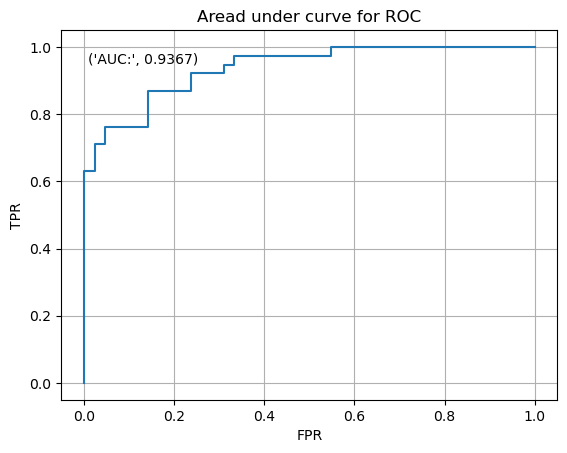

In [189]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.title('Aread under curve for ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(x=.01,y=0.95,s=('AUC:',round(metrics.roc_auc_score(y_test,y_pred_prob),4)))
plt.grid(True)

In [192]:
print('AUC:',round(metrics.roc_auc_score(y_test,y_pred_prob),4))

AUC: 0.9367


In [ ]:
#class 2 ends here 